In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics.pairwise import pairwise_distances

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, \
    adjusted_mutual_info_score, adjusted_rand_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import silhouette_score, calinski_harabaz_score
from sklearn.metrics.pairwise import pairwise_distances

from operator import itemgetter

import warnings
warnings.filterwarnings("ignore")

# Aplicación de aprendizaje no supervisado
                    AGRUPACIONES

En este caso de estudio se analizará el dataset corresponde estadísticas de cáncer de seno calculadas desde los datos de imágenes de tumores obtenidas por el método FNA (fine needle aspiration). Las muestras se etiquetan según el diagnóstico: B = benigno, M = maligno. Son 569 registros cada uno con 32 atributos (ID, CLASS y 30 atributos descriptores).
El dataset no tiene datos faltantes y la distribución de las clases es 357 benignos, 212 malignos.

# Lectura del dataset y conversión de la etiqueta  de la variable 

In [29]:
#dataset = pd.read_csv('D:\ML\T4 unsupervised\wdbc1.csv',header=0,sep=',') 
bc_dataset_columns = ['id','diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                      'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                      'concave_points_mean', 'symmetry_mean', 'fractal_dim_mean',
                      'radius_se','texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                      'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                      'fractal_dim_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
                      'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
                      'concave points_worst', 'symmetry_worst', 'fractal_dim_worst']

dataset = pd.read_csv('D:\ML\T4 unsupervised\wdbc1.csv',skiprows=1,index_col=0, names=bc_dataset_columns).fillna(0.0)
print(dataset.dtypes)

X = dataset.iloc[:,2:]
z = pd.DataFrame()
z = dataset[['area_worst','smoothness_worst','texture_worst']].copy()
    
Y = dataset.iloc[:,1].to_frame()

#replace_map = {"diagnosis": {'M':0, 'B':1}}
#dataset['diagnosis'].replace(replace_map, inplace=True)

diagnosis                 int64
radius_mean             float64
texture_mean            float64
perimeter_mean          float64
area_mean               float64
smoothness_mean         float64
compactness_mean        float64
concavity_mean          float64
concave_points_mean     float64
symmetry_mean           float64
fractal_dim_mean        float64
radius_se               float64
texture_se              float64
perimeter_se            float64
area_se                 float64
smoothness_se           float64
compactness_se          float64
concavity_se            float64
concave points_se       float64
symmetry_se             float64
fractal_dim_se          float64
radius_worst            float64
texture_worst           float64
perimeter_worst         float64
area_worst              float64
smoothness_worst        float64
compactness_worst       float64
concavity_worst         float64
concave points_worst    float64
symmetry_worst          float64
fractal_dim_worst       float64
dtype: o

In [30]:
# A continuación puede verse una muestra del dataset para conocerlo mejor
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dim_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [31]:
# Estadísticos básicos de las columnas del dataset para mayor comprensión del mismo
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
#Estas columnas corresponden  a las columnas centrales que no son visibles en la instrucción 
#anterior debido al manejo de visualizaciones largas de la instrucción describe
AUX = dataset.iloc[:,13:23]
AUX.describe()

,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dim_se,radius_worst,texture_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223
std,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258
min,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000
25%,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000
50%,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000
75%,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000
max,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000


# pair_plot # 
El diagrama de pares se usa para comprender el mejor conjunto de características para explicar una relación entre dos variables o para formar los grupos más separados.
En este caso aún no se ha hecho ingeniería de características porque esta revisión es parte de la exploración de los datos.

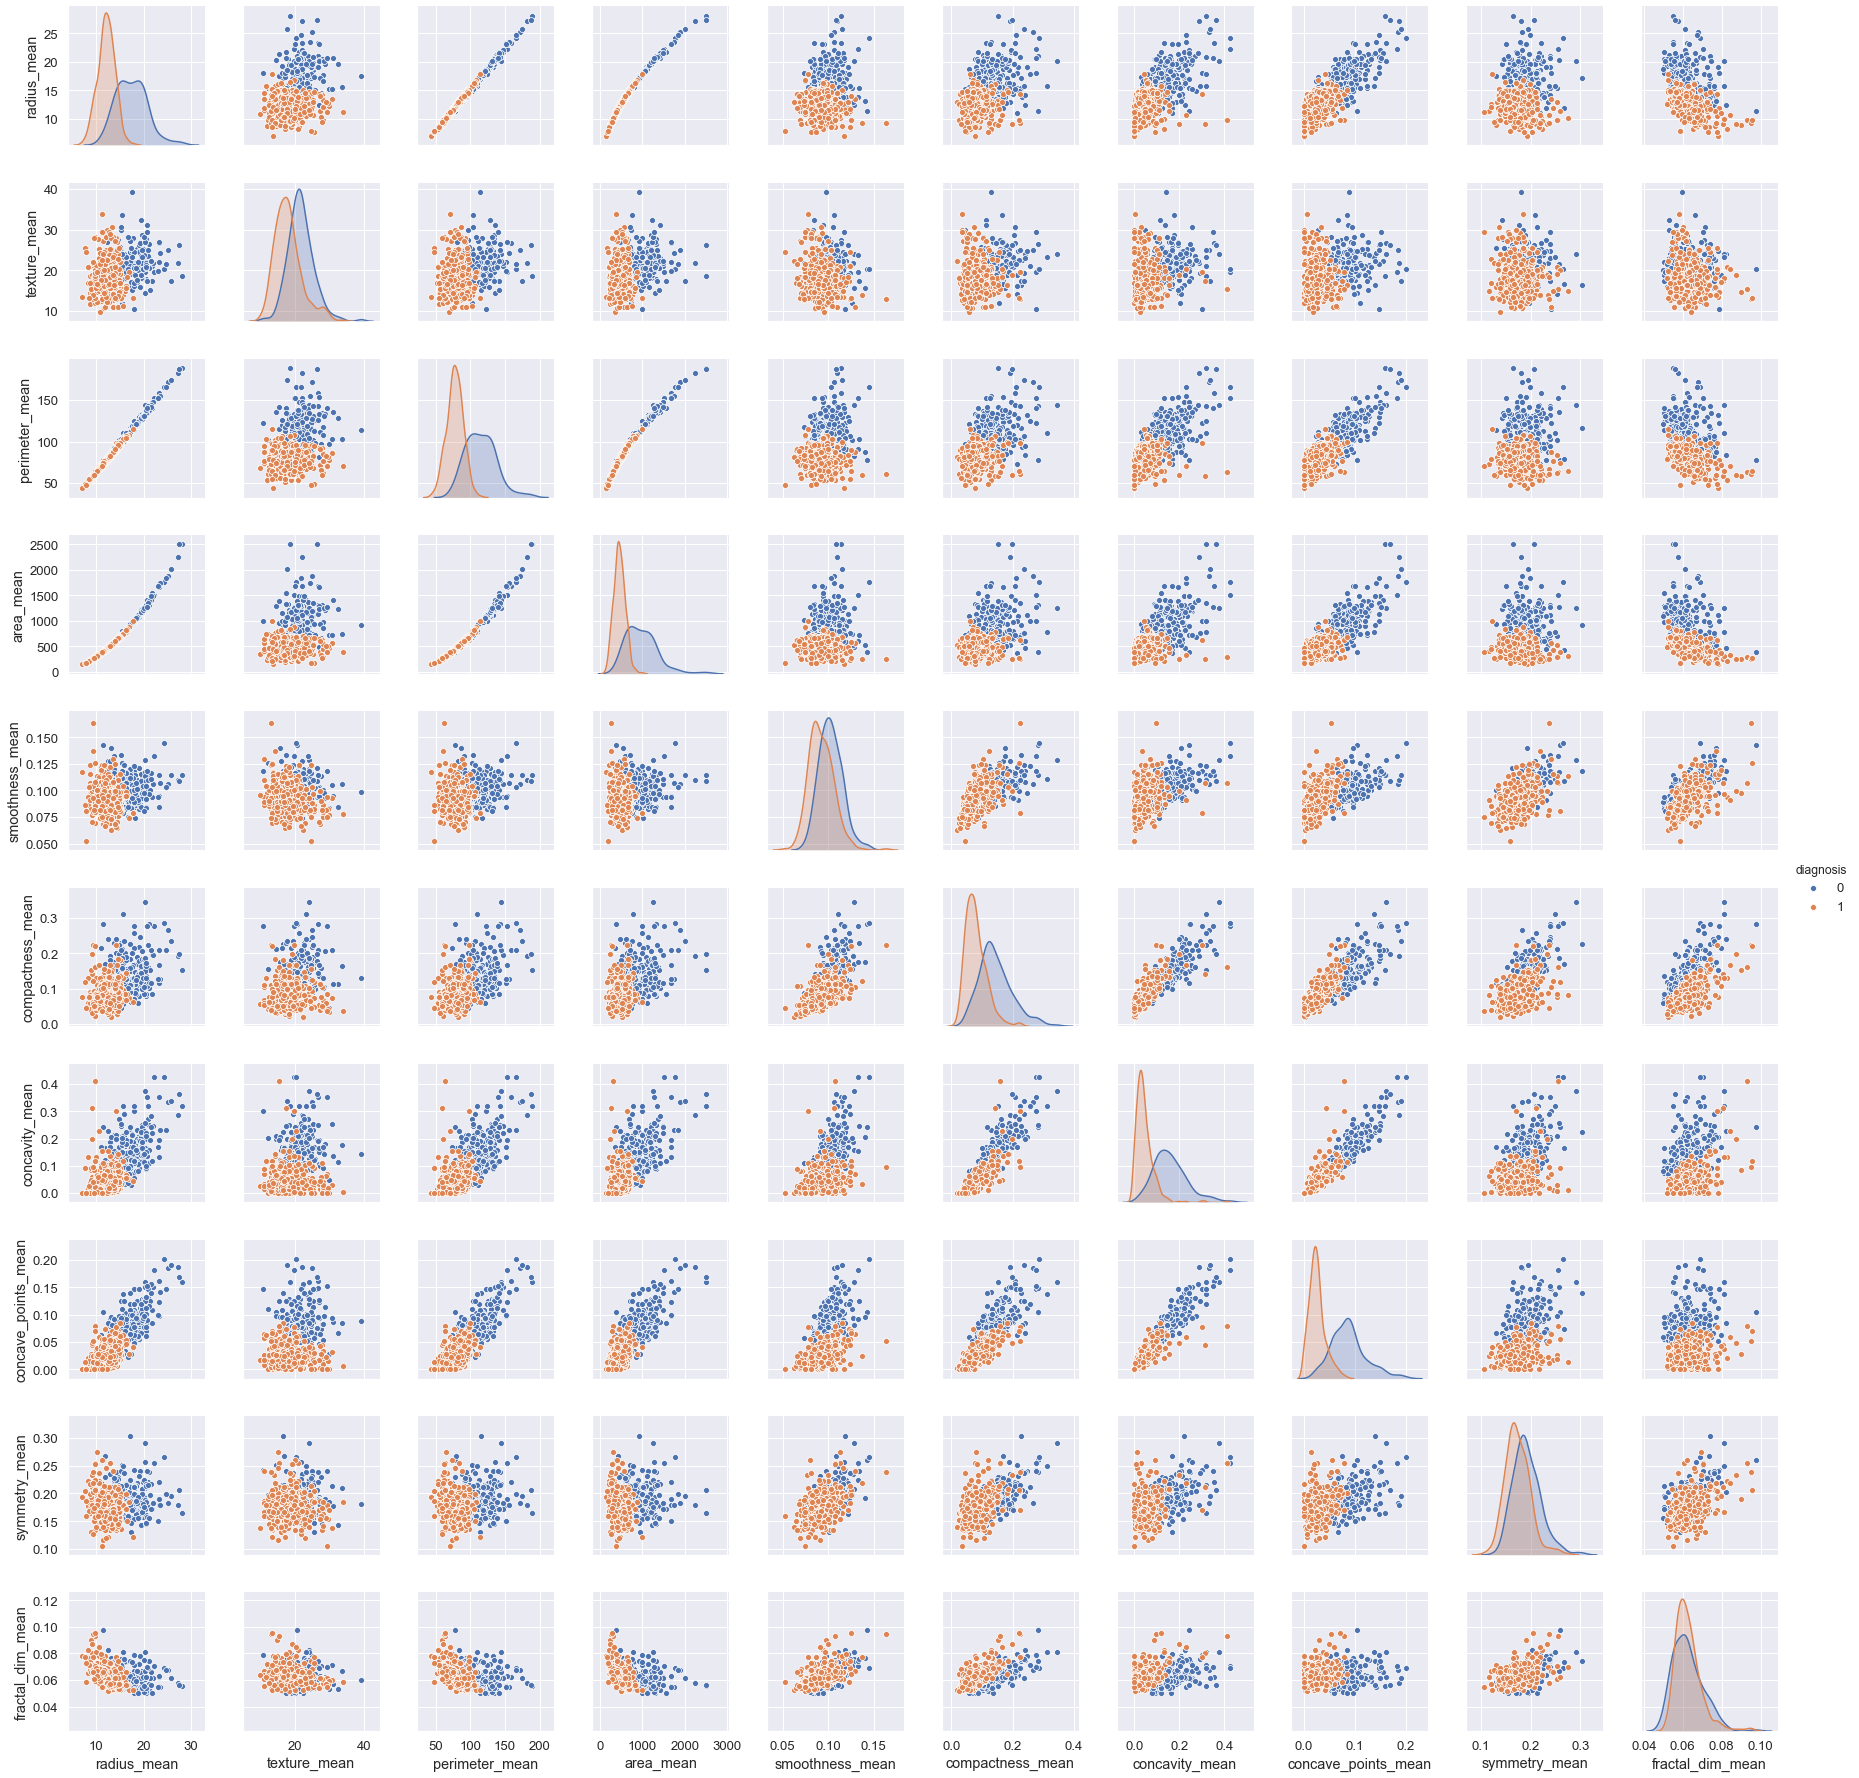

In [33]:
sns.set()

with sns.plotting_context("notebook", font_scale=1.2):
        sns.pairplot(dataset,
                     vars=['radius_mean', 'texture_mean','perimeter_mean', 'area_mean', \
                        'smoothness_mean', 'compactness_mean', 'concavity_mean',\
                      'concave_points_mean', 'symmetry_mean', 'fractal_dim_mean'],
                     hue="diagnosis")
        
        
plt.show()

# t-Distributed Stochastic Neighbor Embedding (t-SNE)
es una técnica no lineal no supervisada utilizada principalmente para la exploración de datos y la visualización de datos de alta dimensión. Específicamente, modela cada objeto de alta dimensión por un punto bidimensional o tridimensional de tal manera que objetos similares son modelados por puntos cercanos y objetos diferentes son modelados por puntos distantes con alta probabilidad.

In [34]:
# Se proyecta el dataset a dos dimensiones
cdf = dataset.drop(['diagnosis'], axis=1)

tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([dataset, df_tsne], axis=1)

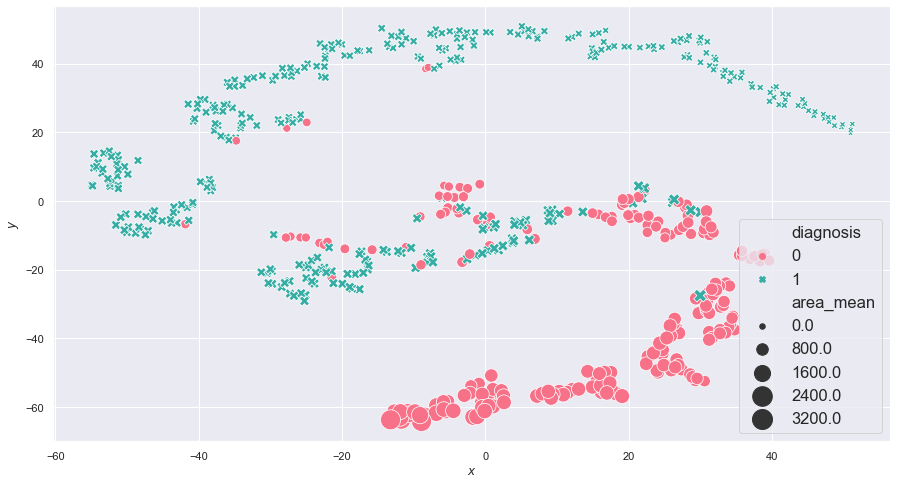

In [35]:
# Show the diagram
fig, ax = plt.subplots(figsize=(15, 8))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
                    y='y',
                    hue='diagnosis',
                    size='area_mean',
                    style='diagnosis',
                    sizes=(30, 400),
                    palette=sns.color_palette("husl", 2),
                    data=dff,
                    ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

In [36]:
####  Se hace una primera corrida del DBSCAN sobre los datos rasos para ver si la 
### calidad de separación que se ve en la figura anterior de los datos rasos es reproducible 
### mediante el DBscan

In [37]:
#Realiza un análisis preliminar del agrupamiento por densidad denominado DBSCAN
#eps= es el radio se prueban varios valores
#min_samples=n, metric='minkowski', p=p)
# Se hacen iteraciones sobre p para la distancia de Minkowsy y sobre el radio Epsilón.
# Se calculan las medidas de precisión del clustering para ver los mejores hiperparámetros, que
# buen valor de la silueta (implica cluster densos y separados entre sí), adicionalmente, 
# se calcula el Calinski Halabsz (CH) para medir que tan separados están los clusters, mide
# la relación de los centroides hacia el centroide global

n_clusters = []
n_noise_points = []
silhouette_scores = []
calinski_harabasz_scores = []

for p in [2,3, 4,5,6,7, 8,9,10,11, 12]:
    n_clusters_p = []
    n_noise_points_p = []
    silhouette_scores_p = []
    calinski_harabasz_scores_p = []

    for eps in np.arange(20, 35, 0.5):
        dst = DBSCAN(eps=eps, min_samples=5, metric='minkowski', p=p)
        Y_pred_t = dst.fit_predict(X)

        n_clusters_p.append(np.max(Y_pred_t) + 1)
        n_noise_points_p.append(np.sum(Y_pred_t == -1))
        silhouette_scores_p.append(silhouette_score(dff, Y_pred_t, metric='minkowski', p=p))
        calinski_harabasz_scores_p.append(calinski_harabasz_score(dff, Y_pred_t))

    n_clusters.append(n_clusters_p)
    n_noise_points.append(n_noise_points_p)
    silhouette_scores.append(silhouette_scores_p)
    calinski_harabasz_scores.append(calinski_harabasz_scores_p)

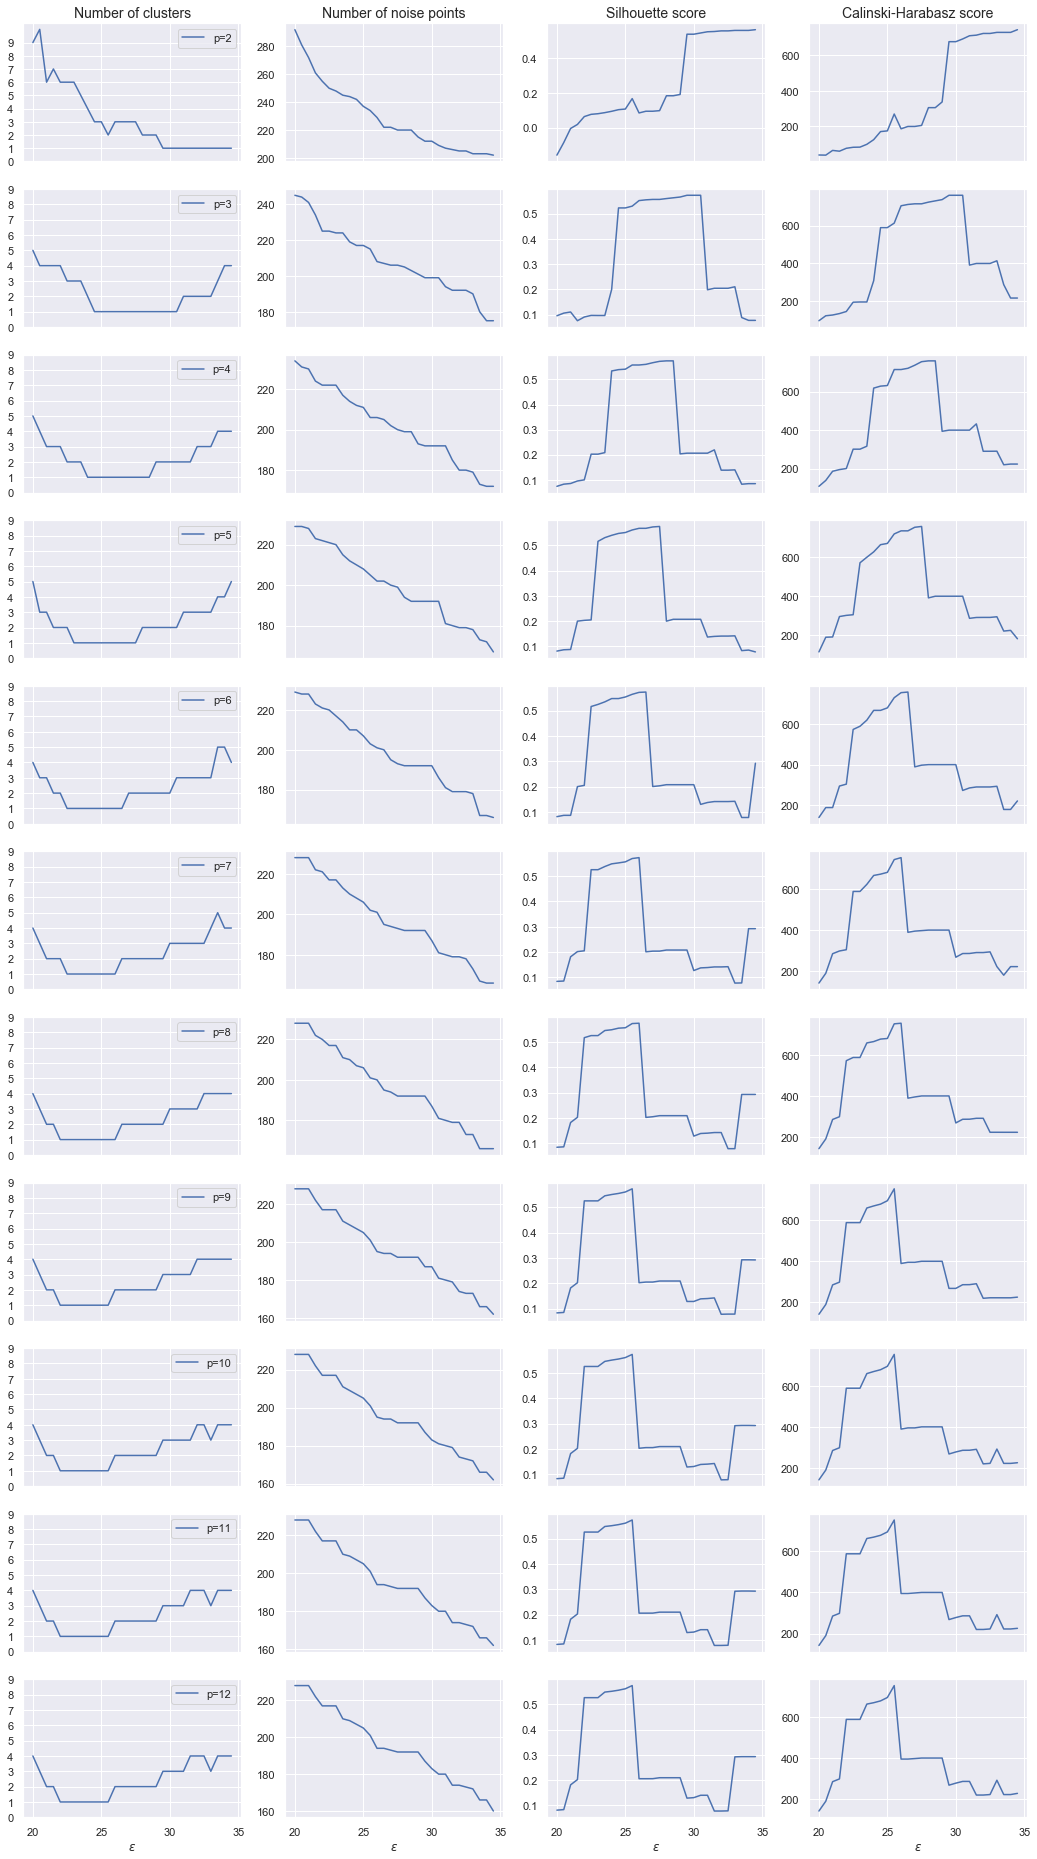

In [38]:
# Mostrar los resultados del análisis preliminar
# Se muestran las gráficas de los tanteos realizados para decidir cual es el valor de p
# y del radio epsilon  para correr y predecir con el modelo que se ajuste.

fig, ax = plt.subplots(11,4, figsize=(18, 33), sharex=True)

for idx, p in enumerate([2,3, 4,5,6,7, 8,9,10,11, 12]):
    x = np.arange(20, 35, 0.5)

    ax[idx, 0].plot(x, n_clusters[idx], label='p={}'.format(p))
    ax[idx, 1].plot(x, n_noise_points[idx], label='p={}'.format(p))
    ax[idx, 2].plot(x, silhouette_scores[idx], label='p={}'.format(p))
    ax[idx, 3].plot(x, calinski_harabasz_scores[idx], label='p={}'.format(p))

ax[0, 0].set_title('Number of clusters', fontsize=14)
ax[0, 1].set_title('Number of noise points', fontsize=14)
ax[0, 2].set_title('Silhouette score', fontsize=14)
ax[0, 3].set_title('Calinski-Harabasz score', fontsize=14)

for i in range(11):
    ax[i, 0].set_yticks(np.arange(0, 10, 1))
    ax[i, 0].legend()
    if i < 4:
        ax[10, i].set_xlabel(r'$\epsilon$')

plt.show()

In [58]:
# Realizar la agrupación
# De la observación de las gráficas se eligen los hiperparámetros para la siguiente
# llamada al DBSCAN

ds = DBSCAN(eps=24, min_samples=5, metric='minkowski', p=3)
Y_pred = ds.fit_predict(X)

print('Number of clusters: {}'.format(np.max(Y_pred) + 1))
print('Number of noise points: {}'.format(np.sum(Y_pred == -1)))

print('Silhouette score: {:.3f}'.format(silhouette_score(dff, Y_pred, metric='minkowski', p=12)))
print('Calinski-Harabasz score: {:.3f}'.format(calinski_harabasz_score(dff, Y_pred)))
print(ds.labels_)

Number of clusters: 2
Number of noise points: 219
Silhouette score: 0.203
Calinski-Harabasz score: 308.934
[-1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  0 -1  0 -1  0 -1 -1  0 -1 -1 -1
  0  0  0  0  0 -1 -1  0 -1 -1  0  0  0  0 -1  0 -1 -1  0  0  0  0 -1  0
 -1  1  0 -1  0 -1 -1  0  0  0 -1 -1  0 -1  1 -1  0  1  1 -1 -1  0 -1 -1
  0  0  0  1 -1 -1  0  0  0 -1  0  0 -1  0  0  0 -1  0  0  0  0 -1 -1 -1
  0 -1 -1  1  0  0 -1 -1  1 -1  0 -1 -1 -1 -1  0  0  0 -1  0  0 -1  0  0
  0  0  0  1  1  0  0 -1  0  0  0  0 -1 -1  0  0  0 -1 -1  0 -1  1  0 -1
 -1  1  0 -1 -1  0  0  0  0 -1  0  0 -1 -1 -1  0 -1  0 -1  0  0  0  0 -1
  0 -1  1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1  0 -1 -1  0 -1 -1  1  0
  0  0 -1 -1  0  0  0 -1  0  1  0  1  0 -1 -1  0  0 -1  0  0 -1 -1  0 -1
  0  0  0  0 -1  0  0  0  0  0 -1  0 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0  0  0  0  0 -1  0 -1 -1  0 -1  0  0 -1  0 -1 -1  0  0  0  0
  0  0 -1  1  0  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


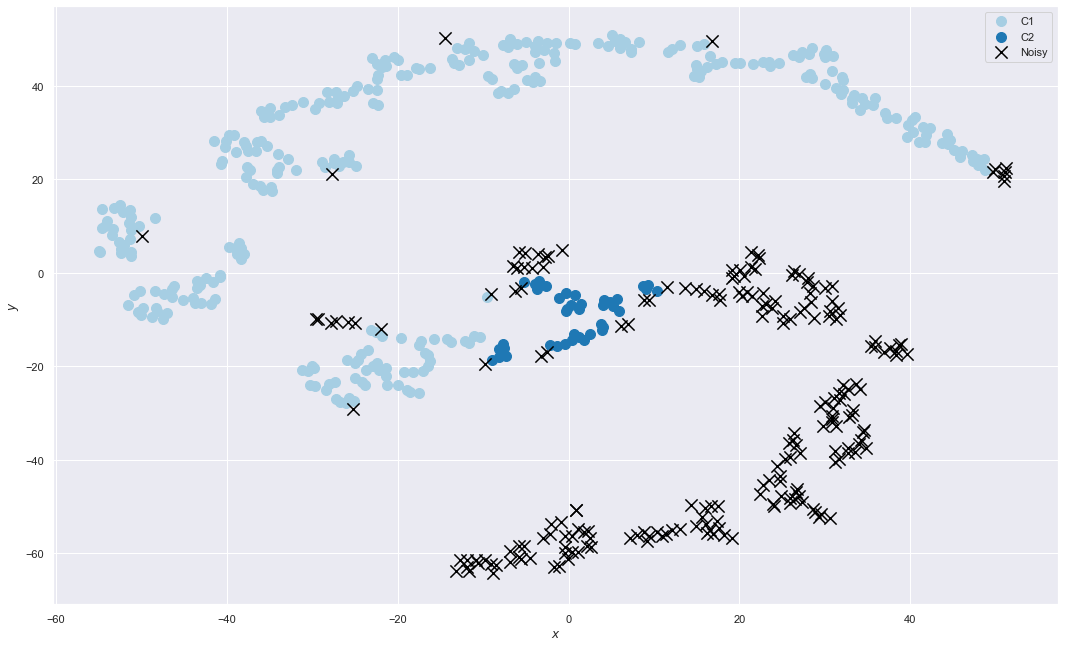

In [59]:
# Mostrar los resultados
fig, ax = plt.subplots(figsize=(18, 11))

for i in range(np.max(np.unique(Y_pred)) + 1):
    ax.scatter(data_tsne[Y_pred == i, 0], data_tsne[Y_pred == i, 1], s=100, c=cm.Paired(i),
                label='C{}'.format(i + 1))

ax.scatter(data_tsne[Y_pred == -1, 0], data_tsne[Y_pred == -1, 1], marker='x', c='black', s=150, label='Noisy')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

In [41]:
# Describe the region x < 10   x> -40
sdff = dff[(dff.x < -10.0)]
print(sdff[sdff.columns[0:10]].describe())

# Describe the region x > 40 and -40 < y < 40
sdff = dff[(dff.x > 40.0) & (dff.y > -40.0) & (dff.y < 40.0)]
print(sdff[sdff.columns[0:10]].describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean   area_mean  \
count  213.000000   213.000000    213.000000      213.000000   213.00000   
mean     0.896714    13.066385     18.523286       84.325164   542.04507   
std      0.305049     2.236392      4.077682       15.437776   262.19675   
min      0.000000    11.340000     10.820000       72.480000   386.10000   
25%      1.000000    12.060000     15.900000       77.790000   447.80000   
50%      1.000000    12.760000     17.920000       82.010000   496.60000   
75%      1.000000    13.380000     20.760000       86.340000   551.10000   
max      1.000000    27.420000     31.120000      186.900000  2501.00000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       213.000000        213.000000      213.000000           213.000000   
mean          0.093128          0.085839        0.055272             0.032494   
std           0.013839          0.042571        0.055412             0.0

# CLUSTERING CON SELECCION DE FEATURES
Luego de las pruebas exploratorias se aplican técnicas de selección de atributos para ejecutar
nuevamente el agrupamiento.

In [43]:
# Ingenieria de atributos

#Para la ingeniería de atributos se usará un procedimiento basado en un método univariado con un método multivariado

#1) Se usará SelectKBest para determinar cuán significativa es cada una de las 30 variables frente a la variable dependendiente. Esto da un ranking de valores F-test para las características.
#Se prefieren las variables con F-test mayor de 2 ya que se usa el método f_clasif que se basa en la Anova de la relación de cada X con Y.

#2)Se utiliza la correlacion de pearson para determinar cuáles de las variables independientes se explican entre sí:

#El coeficiente de correlación de Pearson (r) se mide en una escala de -1 a 1, tanto en dirección positiva como negativa. Un valor de “0” indica que no hay relación lineal entre las variables. Un valor de “1” o “–1” indica, respectivamente, una correlación positiva perfecta o negativa perfecta entre dos variables.


Scores de todas las características: 
 [['perimeter_mean' '4261.025538413766']
 ['texture_mean' '324.3075301940883']
 ['fractal_dim_se' '33.93276312583311']
 ['perimeter_worst' '32.48298594917103']
 ['texture_worst' '25.02321756324779']
 ['perimeter_se' '11.403976655557603']
 ['concavity_mean' '4.185761572239062']
 ['texture_se' '3.741054703971921']
 ['fractal_dim_mean' '3.6433072762119028']
 ['compactness_mean' '2.7175331431507974']
 ['concavity_worst' '2.5161110008263514']
 ['compactness_se' '1.9325008920793478']
 ['symmetry_se' '1.777826857730488']
 ['area_se' '1.7008322257032145']
 ['compactness_worst' '1.6179552294549706']
 ['concavity_se' '1.533530824601663']
 ['smoothness_mean' '1.4390519953298972']
 ['symmetry_mean' '1.366006211210256']
 ['radius_se' '1.327144164811755']
 ['radius_mean' '1.293558006049771']
 ['radius_worst' '1.2211684417746964']
 ['area_worst' '1.1872184119427174']
 ['smoothness_se' '1.166568968750819']
 ['area_mean' '1.1396227020554979']
 ['smoothness_worst' '

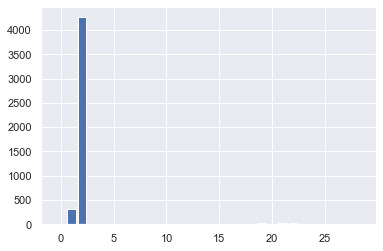

In [44]:
#Selección de características para análisis univariado---------------------------#
encabezados = bc_dataset_columns[2:]
# f_classif
kVal = 12
test = SelectKBest(score_func=f_classif, k=kVal)
fit = test.fit(X, Y)
# summarize scores
i=0
feat = []
for f in fit.scores_:
  feat.append([encabezados[i],f])
  i = i+1

feat = sorted(feat, key=itemgetter(1), reverse=True)
feat = np.array(feat)
print("Scores de todas las características: \n",feat)
selectFeat = np.take(feat,range(kVal*2))

featCols = [a for a in encabezados if a in selectFeat]
print("\n Selected Features: \n",featCols)

#feat = np.sort(feat) 
features_1 = fit.transform(X)

# dibujar losscores
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)
plt.show()

In [45]:
#Realiza un análisis preliminar del agrupamiento por densidad denominado DBSCAN
#eps= es el radio se prueban varios valores
#min_samples=5, metric='minkowski', p=p)

n_clusters = []
n_noise_points = []
silhouette_scores = []
calinski_harabasz_scores = []

for p in [2,3, 4,5,6,7, 8,9,10,11, 12]:
    n_clusters_p = []
    n_noise_points_p = []
    silhouette_scores_p = []
    calinski_harabasz_scores_p = []

    for eps in np.arange(20, 35, 0.5):
        dst = DBSCAN(eps=eps, min_samples=5, metric='minkowski', p=p)
        Y_pred_t = dst.fit_predict(features_1)

        n_clusters_p.append(np.max(Y_pred_t) + 1)
        n_noise_points_p.append(np.sum(Y_pred_t == -1))
        silhouette_scores_p.append(silhouette_score(dff, Y_pred_t, metric='minkowski', p=p))
        calinski_harabasz_scores_p.append(calinski_harabasz_score(dff, Y_pred_t))

    n_clusters.append(n_clusters_p)
    n_noise_points.append(n_noise_points_p)
    silhouette_scores.append(silhouette_scores_p)
    calinski_harabasz_scores.append(calinski_harabasz_scores_p)

[20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5
 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5
 34.  34.5] [0.0648905289490094, 0.06821289480054397, 0.07090583841852488, 0.12848850441741846, 0.14544302543536056, 0.5055784776697227, 0.5055784776697227, 0.5130873171685353, 0.5255286777246498, 0.5293088540653784, 0.5327182995731081, 0.5344881409877105, 0.5548169993415794, 0.5548169993415794, 0.5564420459423298, 0.5564420459423298, 0.5598332602720216, 0.1931194623219176, 0.19270155684082704, 0.1962858057554908, 0.1962858057554908, 0.20151684524430938, 0.20151684524430938, 0.20969605263160945, 0.20969605263160945, 0.20969605263160945, 0.21810661627563058, 0.0883885676133409, 0.07944423919050536, 0.07944423919050536]


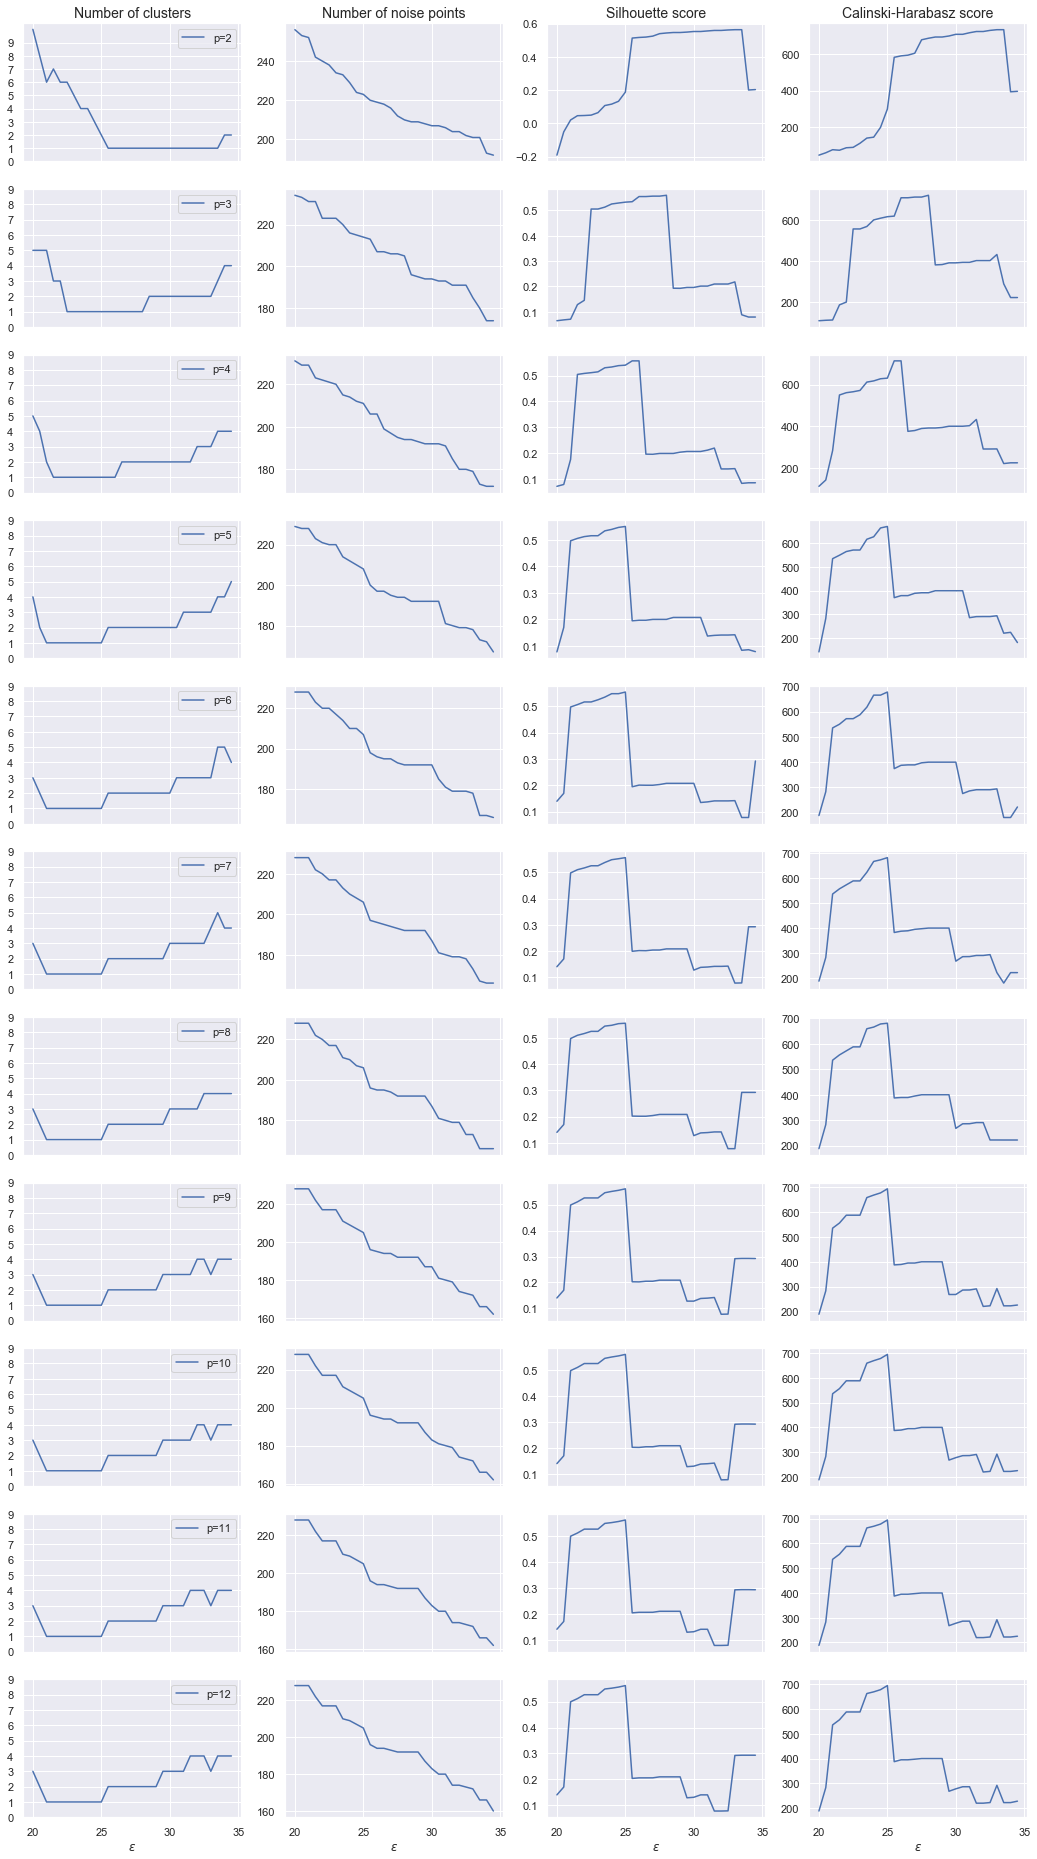

In [46]:
# Mostrar los resultados del análisis preliminar
fig, ax = plt.subplots(11,4, figsize=(18, 33), sharex=True)

for idx, p in enumerate([2,3, 4,5,6,7, 8,9,10,11, 12]):
    x = np.arange(20, 35, 0.5)

    ax[idx, 0].plot(x, n_clusters[idx], label='p={}'.format(p))
    ax[idx, 1].plot(x, n_noise_points[idx], label='p={}'.format(p))
    ax[idx, 2].plot(x, silhouette_scores[idx], label='p={}'.format(p))
    ax[idx, 3].plot(x, calinski_harabasz_scores[idx], label='p={}'.format(p))
    if p== 3:
        print(x,silhouette_scores[idx])

ax[0, 0].set_title('Number of clusters', fontsize=14)
ax[0, 1].set_title('Number of noise points', fontsize=14)
ax[0, 2].set_title('Silhouette score', fontsize=14)
ax[0, 3].set_title('Calinski-Harabasz score', fontsize=14)

for i in range(11):
    ax[i, 0].set_yticks(np.arange(0, 10, 1))
    ax[i, 0].legend()
    if i < 4:
        ax[10, i].set_xlabel(r'$\epsilon$')

plt.show()

In [47]:
# Realizar la agrupación
#ds = DBSCAN(eps=28, min_samples=10, metric='minkowski', p=2)
ds = DBSCAN(eps=21.5, min_samples=5, metric='minkowski', p=3)
Y_pred = ds.fit_predict(features_1)

print('Number of clusters: {}'.format(np.max(Y_pred) + 1))
print('Number of noise points: {}'.format(np.sum(Y_pred == -1)))

print('Silhouette score: {:.3f}'.format(silhouette_score(dff, Y_pred, metric='minkowski', p=12)))
print('Calinski-Harabasz score: {:.3f}'.format(calinski_harabasz_score(dff, Y_pred)))
print(ds.labels_)

Number of clusters: 3
Number of noise points: 231
Silhouette score: 0.126
Calinski-Harabasz score: 184.820
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1
  0  0  0  0  0 -1 -1  0 -1 -1  0  0  0  0 -1  0 -1 -1  0  0  0  0 -1  0
 -1 -1  0 -1  0 -1 -1  0  0  0 -1 -1  0 -1  1 -1  0  1  1 -1 -1  0 -1 -1
  0  0  0  1 -1 -1  0  0  0 -1  0  0 -1  0  0  0 -1  0  0  0  0 -1 -1 -1
  0 -1 -1  1  0  0 -1 -1  1 -1  0 -1 -1 -1 -1  0  0  0 -1  0  0 -1  0  0
  0  0  0  1  0  0  0 -1  0  0  0  0 -1 -1  0  0  0 -1 -1  0 -1  1  0 -1
 -1  1  0 -1 -1  0  0  0  0 -1  0  0 -1 -1 -1  0 -1 -1 -1  0  0  0  0 -1
  0 -1  1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1  0 -1 -1  0 -1 -1  2  0
  0  0 -1 -1  0  0  0 -1  0 -1  0  1  0 -1 -1  0  0 -1  0  0 -1 -1  0 -1
  0  0  0  0 -1  0  0  0  0  0 -1  0 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0  0  0 -1  0 -1  0 -1 -1  0 -1  0  0 -1  0 -1 -1  0  0  0  0
  0  0 -1  1  0  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


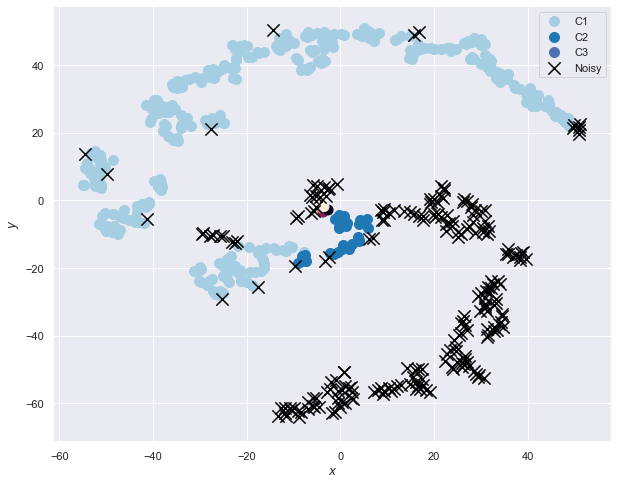

In [48]:
# Mostrar los resultados
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(np.max(np.unique(Y_pred)) + 1):
    ax.scatter(data_tsne[Y_pred == i, 0], data_tsne[Y_pred == i, 1], s=100, c=cm.Paired(i),
                label='C{}'.format(i + 1))

ax.scatter(data_tsne[Y_pred == -1, 0], data_tsne[Y_pred == -1, 1], marker='x', c='black', s=150, label='Noisy')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

# CLUSTERING POR K-MEANS++

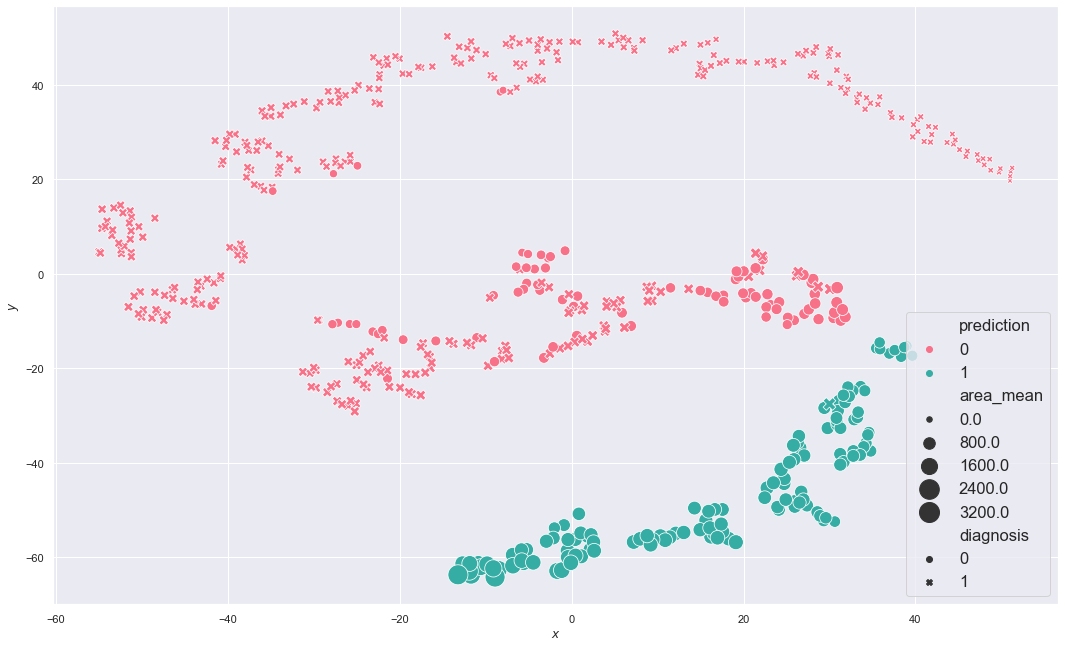

In [49]:
#hace un K-Means++ preliminar con K=2, usando el dataset de features_1 no todo el original,
#este dataset es el resultado de la ingeniería de datos

km = KMeans(n_clusters=2, init='k-means++',max_iter=1000, random_state=1000)
#Y_pred = km.fit_predict(cdf)
Y_pred = km.fit_predict(features_1)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

# Show the clustering result
fig, ax = plt.subplots(figsize=(18, 11))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
                    y='y',
                    hue='prediction',
                    size='area_mean',
                    style='diagnosis',
                    sizes=(30, 400),
                    palette=sns.color_palette("husl", 2),
                    data=kmdff,
                    ax=ax)
    
    
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

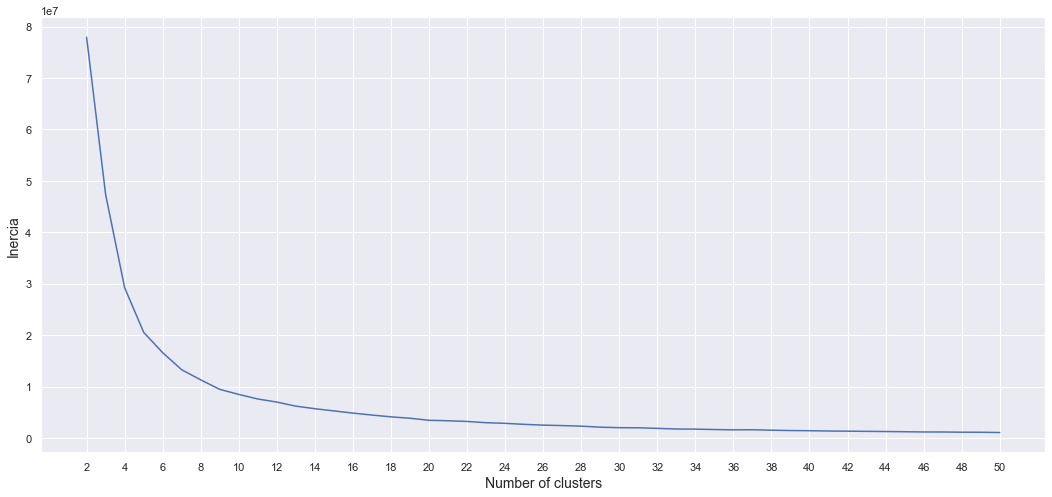

In [50]:
# Calcula la inercia y se gráfica para aplicar la regla del codo
inercias = []

for i in range(2, 51):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=1000, random_state=1000)
    km.fit(cdf)
    inercias.append(km.inertia_)

# Show the plot inertia vs. no. clusters
fig, ax = plt.subplots(figsize=(18, 8))

ax.plot(np.arange(2, 51, 1), inercias)
ax.set_xlabel('Number of clusters', fontsize=14)
ax.set_ylabel('Inercia', fontsize=14)
ax.set_xticks(np.arange(2, 51, 2))

plt.show()

nb_clusters = [2, 4, 6, 8]
mapping = [(0, 0), (0, 1), (1, 0), (1, 1)]

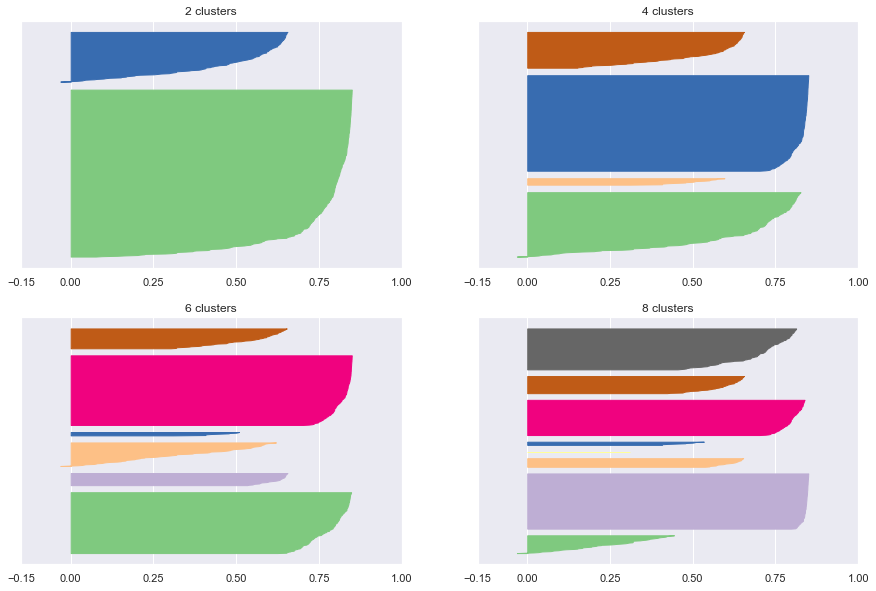

In [51]:
# Show the silhouette plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, n in enumerate(nb_clusters):
    km = KMeans(n_clusters=n, random_state=1000)
    Y = km.fit_predict(cdf)
    df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
    kmdff = pd.concat([dff, df_km], axis=1)

    silhouette_values = silhouette_samples(cdf, kmdff['prediction'])

    ax[mapping[i]].set_xticks([-0.15, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[mapping[i]].set_yticks([])
    ax[mapping[i]].set_title('%d clusters' % n)
    ax[mapping[i]].set_xlim([-0.15, 1])
    y_lower = 20

    for t in range(n):
        ct_values = silhouette_values[Y == t]
        ct_values.sort()

        y_upper = y_lower + ct_values.shape[0]
        
        color = cm.Accent(float(t) / n)
        ax[mapping[i]].fill_betweenx(np.arange(y_lower, y_upper), 0, ct_values, facecolor=color, edgecolor=color)

        y_lower = y_upper + 20

plt.show()

In [52]:
# Explicación del gráfico del coeficiente de Silueta
# - Diferencias en el ancho implican clusters desbalanceados
# - Bandas con forma de punta afilada : la distancia promedio inter-cluster
#   tiene mucha varianza
# - Un Buen gráfico de silueta debería tener barras de ancho similar
#    y punta redondeada con y coeficiente de silueta cercano a 1
# - Una forma de cigarro significa distancia intra-cluster muy cercanas a 
#   su promedio ( alta cohesión) y clara separación entre clusters


In [53]:
# Perform a K-Means clustering with K=6
km = KMeans(n_clusters=6,init='k-means++', max_iter=1000, random_state=1000)
Y_pred = km.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

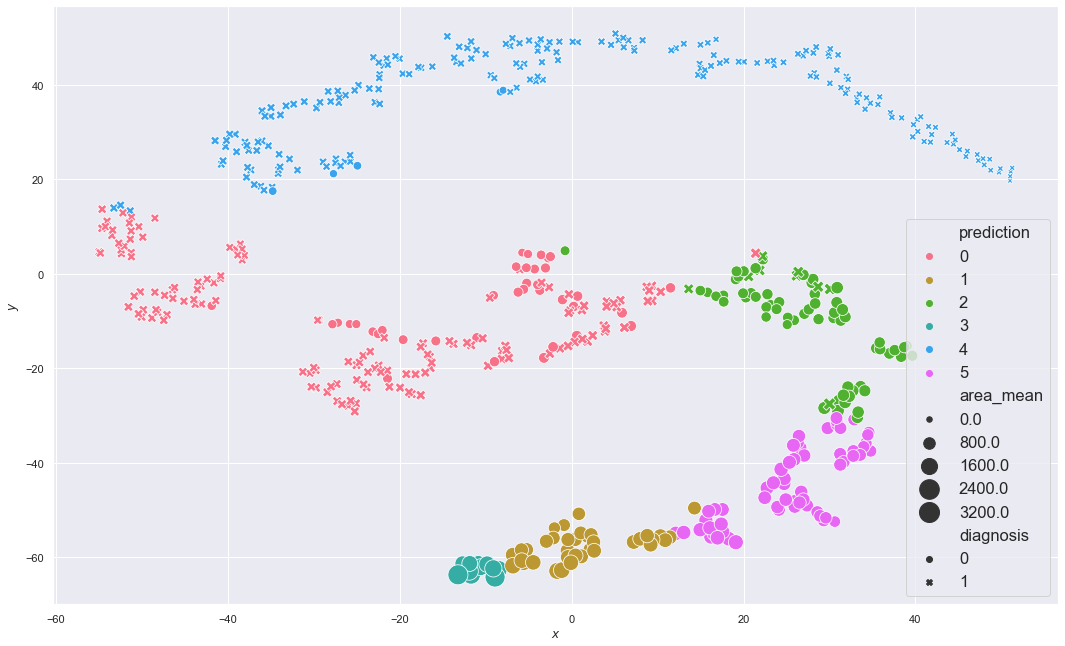

In [54]:
# Show the result
fig, ax = plt.subplots(figsize=(18, 11))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
                    y='y',
                    hue='prediction',
                    size='area_mean',
                    style='diagnosis',
                    sizes=(30, 400),
                    palette=sns.color_palette("husl", 6),
                    data=kmdff,
                    ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

In [55]:
# Descripción de dos agrupaciones , la vertde  y la fucsia
sdff = dff[(dff.x > 20.0) & (dff.x < 40.0) & (dff.y > -30.0) & (dff.y < 5.0)]
print(sdff[['perimeter_mean', 'area_mean', 'smoothness_mean',
            'concavity_mean', 'symmetry_mean']].describe())

sdff = dff[(dff.x > -60.0) & (dff.y < -35.0) & (dff.y < 40.0)]
print(sdff[['perimeter_mean', 'area_mean', 'smoothness_mean',
            'concavity_mean', 'symmetry_mean']].describe())
nb_clusters = [2, 4, 6, 8]
mapping = [(0, 0), (0, 1), (1, 0), (1, 1)]

       perimeter_mean    area_mean  smoothness_mean  concavity_mean  \
count       60.000000    60.000000        60.000000       60.000000   
mean       105.574333   805.416667         0.098825        0.123531   
std          5.607260    89.234686         0.013365        0.063748   
min         91.560000   597.800000         0.073710        0.028910   
25%        102.400000   744.850000         0.089450        0.070887   
50%        105.750000   798.300000         0.098390        0.116350   
75%        109.300000   857.725000         0.106775        0.170550   
max        117.400000  1024.000000         0.132300        0.317600   

       symmetry_mean  
count      60.000000  
mean        0.185075  
std         0.026802  
min         0.122000  
25%         0.169500  
50%         0.184650  
75%         0.199200  
max         0.252100  
       perimeter_mean    area_mean  smoothness_mean  concavity_mean  \
count       99.000000    99.000000        99.000000       99.000000   
mean       